### Load Libraries

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

### Load the group image

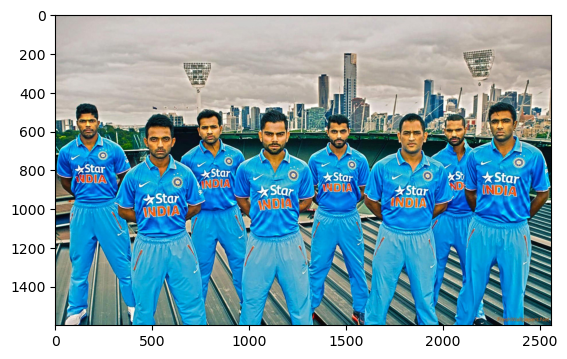

In [4]:
imgbgr = cv2.imread('./images/group_img.jpg')
imgrgb=cv2.cvtColor(imgbgr,cv2.COLOR_BGR2RGB)
plt.imshow(imgrgb)
img1=imgrgb.copy()

### Python library (mtcnn - multi task cnn) for face detection 

In [5]:
from mtcnn.mtcnn import MTCNN

In [14]:
facedet_model = MTCNN()
results = detector.detect_faces(imgrgb) # detect faces in the image
len(results)

2/2 [==============================] - 0s 28ms/step


8

In [7]:
results

[{'box': [746, 530, 107, 133],
  'confidence': 0.9999998211860657,
  'keypoints': {'left_eye': (773, 581),
   'right_eye': (821, 577),
   'nose': (799, 607),
   'mouth_left': (783, 634),
   'mouth_right': (820, 630)}},
 {'box': [1791, 555, 110, 146],
  'confidence': 0.9999998211860657,
  'keypoints': {'left_eye': (1816, 608),
   'right_eye': (1868, 609),
   'nose': (1839, 642),
   'mouth_left': (1819, 666),
   'mouth_right': (1862, 667)}},
 {'box': [1068, 555, 121, 155],
  'confidence': 0.9999788403511047,
  'keypoints': {'left_eye': (1105, 615),
   'right_eye': (1162, 616),
   'nose': (1136, 648),
   'mouth_left': (1110, 675),
   'mouth_right': (1157, 677)}},
 {'box': [476, 578, 125, 168],
  'confidence': 0.9999775290489197,
  'keypoints': {'left_eye': (513, 643),
   'right_eye': (572, 642),
   'nose': (545, 675),
   'mouth_left': (519, 707),
   'mouth_right': (567, 705)}},
 {'box': [2013, 548, 99, 122],
  'confidence': 0.999918520450592,
  'keypoints': {'left_eye': (2037, 594),
   'r

### Extract face regions from the group image 

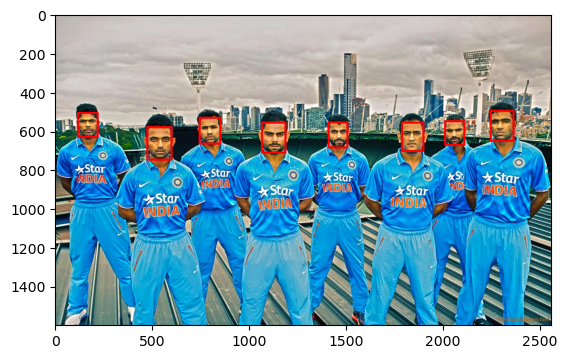

In [8]:
faces=[]
for i in range(len(results)):
    
    x1,y1,width,height=results[i]['box']
    
    #getting bounding box cordinates for detecting the face
    
    x1,y1=abs(x1),abs(y1)
    x2,y2=x1+width ,y1+height
    cv2.rectangle(imgrgb,(x1,y1),(x2,y2),(255,0,0),10) #draw rectangle around face
    
    # extract the face
    face=img1[y1:y2,x1:x2]
    faces.append(face)
    
plt.imshow(imgrgb)
plt.show()

### Displaying extracted faces 

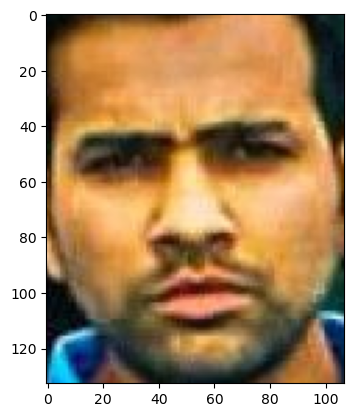

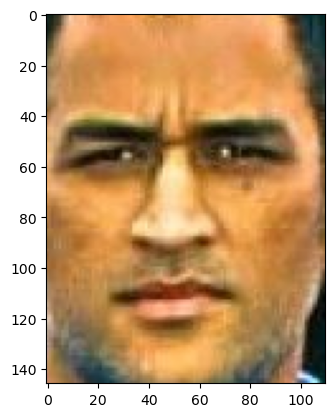

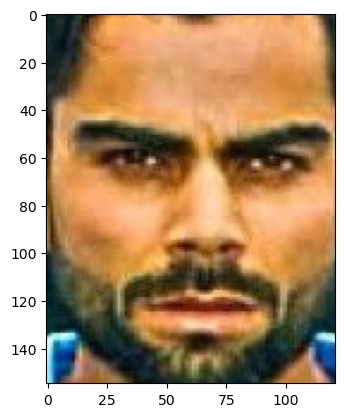

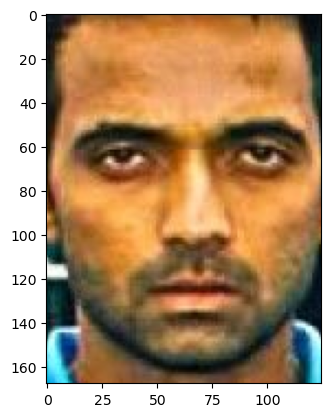

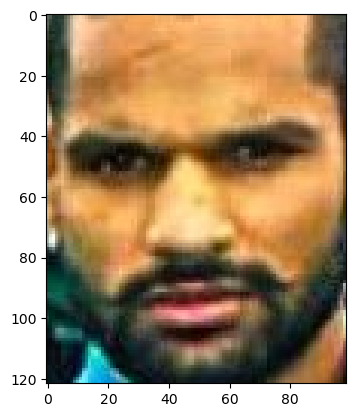

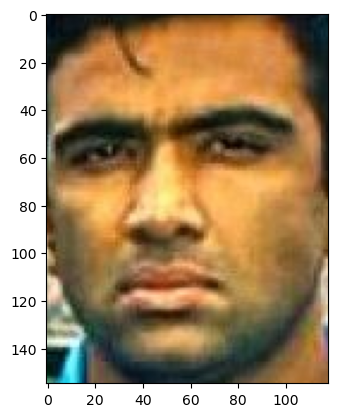

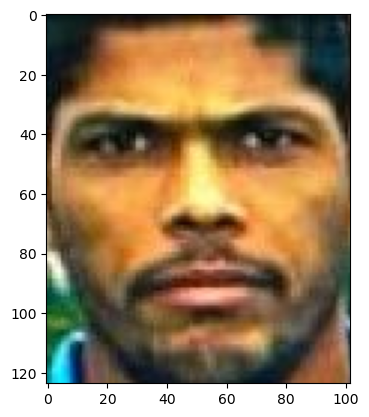

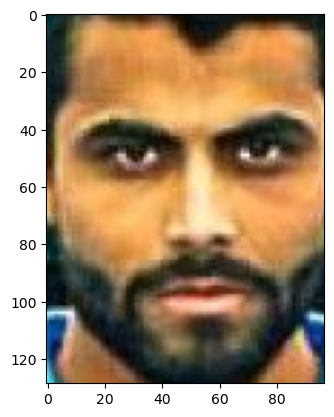

In [9]:
for i in range(len(faces)):
    plt.imshow(faces[i])
    plt.show()

In [12]:
from keras_facenet import FaceNet

### Extracting the faces from the database images.
 *   Extracting faces from the database images and storing them in a list
 *   Storing person names in a list

In [ ]:
face_ref=[]
names=[]
dbfolder="./images_db/"
db_images=os.listdir(dbfolder)
for i in range(len(db_images)):
    #print(db_images[i])
    path=dbfolder+db_images[i]
    imgdb=plt.imread(path)
    names.append(db_images[i])
    db_img_results=facedet_model.detect_faces(imgdb) #detect faces in the image
    # extract the bounding box from the database image.
    x1,y1,width,height=db_img_results[0]['box'] #as only one face in the image
    x1,y1=abs(x1),abs(y1)
    x2,y2=x1+width ,y1+height
    
    face=imgdb[y1:y2,x1:x2] #
    img_rz=cv2.resize(face,(160,160))
    face_ref.append(img_rz)
    
    plt.subplot(2,6,i+1)
    plt.axis('off')
    plt.imshow(face)
plt.show()

### Calculating face embeddings for the database  images 

In [16]:
embedder=FaceNet()
emb_ref=[]

for i in range(len(face_ref)): # face images from the database
    face_img=face_ref[i].astype("float32")
    
    # standardize pixel values across channels (global)
    face_img=np.expand_dims(face_img,axis=0)
    emb_ref.append(embedder.embeddings(face_img))
  
 print(len(emb_ref))


1/1 [==============================] - 0s 142ms/step
12


In [ ]:
#face_ref=contains images from db
#faces=contains images from group photo

### Calculate face embedding for the nth person of the group image

In [ ]:
n=2
f_anchor=faces[n].astype('float32') #nth face_image from group photo
f_anchor=np.expand_dims(f_anchor,axis=0)  # expand dimensions
emb_anchor=embedder.embeddings(f_anchor)#vector of embeddings
plt.imshow(faces[n])
plt.title('Group Image Person')
plt.show()


### Calculate diffrence between various database images and anchor image(nth person of the group image) 

1/1 [==============================] - 1s 1s/step


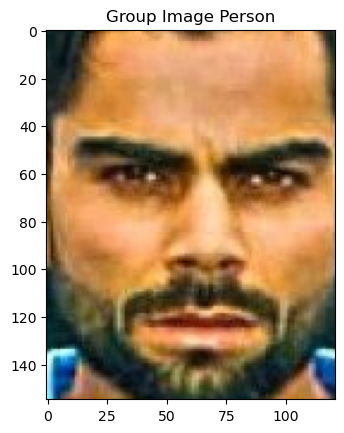

12


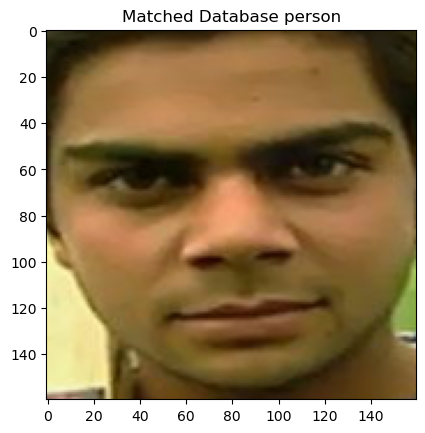

The matched person name is: kholi_young


In [17]:
dist=[]
print(len(emb_ref))
for j in range(len(emb_ref)):
    #print("j=",j)
    euclidian_dist=np.sqrt(np.sum((emb_anchor[0]-emb_ref[j][0])**2)) #calculating euclidian distance between anchor image 
    dist.append(euclidian_dist)

ind=np.array(dist).argmin()

plt.imshow(face_ref[ind])
plt.title('Matched Database person')
plt.show()

print('The matched person name is:',names[ind].split('.')[0])

